In [1]:
# add surgepy to path
import os
os.chdir('../../buildpy/')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import surgepy
import numpy as np

In [2]:
def create_surge():
    surge = surgepy.createSurge(48000)
    surge.process()
    return surge, surge.getPatch()

def set_source_sine(surge, patch):
    osc_type = patch['scene'][0]['osc'][0]['type']
    surge.setParamVal(osc_type, 1) # set osc type to sine

BLOCKS = 200
NOTE = 60

def process_sine(surge):
    audio = surge.createMultiBlock(BLOCKS)
    surge.playNote(0, NOTE, 127, 0)
    surge.processMultiBlock(audio)
    return audio[0]

GFX0_IDX = 6
NEURON_IDX = 15

def set_fx(surge, patch):
    fx_type = patch['fx'][GFX0_IDX]['type']
    surge.setParamVal(fx_type, NEURON_IDX)
    # surge.setParamVal(fx_type, 0)
    surge.process()

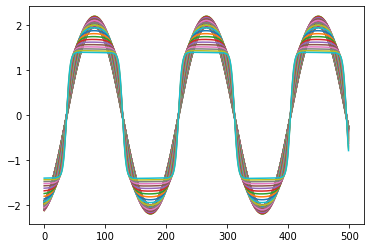

In [3]:
# Tuning Wh
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wf_param, 0)
    surge.setParamVal(uf_param, 0)
    surge.setParamVal(uh_param, 0)
    surge.setParamVal(bf_param, 1.0 / 6.0)

wh_vals = np.linspace(-24.0, 24.0, 50)
amplitudes = []

for wh in wh_vals:
    surge, patch = create_surge()
    set_source_sine(surge, patch)
    set_fx(surge, patch)
    set_default_params(surge, patch)
    
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    surge.setParamVal(wh_param, wh)
    sine = process_sine(surge)
    amplitudes.append(1.0 / np.max(np.abs(sine[4000:5000])))
    plt.plot(sine[4000:4500])

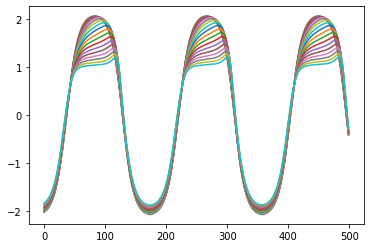

In [4]:
# Tuning Wf
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wh_param, 12.0)
    surge.setParamVal(uf_param, 0)
    surge.setParamVal(uh_param, 0)
    surge.setParamVal(bf_param, 1.0 / 6.0)

wf_vals = np.linspace(0.0, 1.0, 20)
for wf in wf_vals:
    surge, patch = create_surge()
    set_source_sine(surge, patch)
    set_fx(surge, patch)
    set_default_params(surge, patch)
    
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    surge.setParamVal(wf_param, wf)
    sine = process_sine(surge)
    plt.plot(sine[4000:4500])

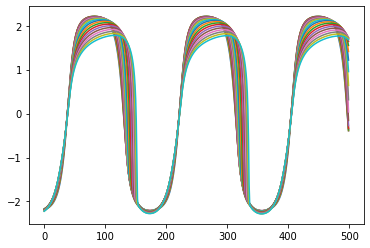

In [8]:
# Tuning Uf
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wf_param, 0)
    surge.setParamVal(wh_param, 12.0)
    surge.setParamVal(uh_param, 1.0)
    surge.setParamVal(bf_param, 1.0 / 6.0)

uf_vals = np.linspace(0.0, 1.0, 20)
for uf in uf_vals:
    surge, patch = create_surge()
    set_source_sine(surge, patch)
    set_fx(surge, patch)
    set_default_params(surge, patch)
    
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    surge.setParamVal(uf_param, uf)
    sine = process_sine(surge)
    plt.plot(sine[4000:4500])

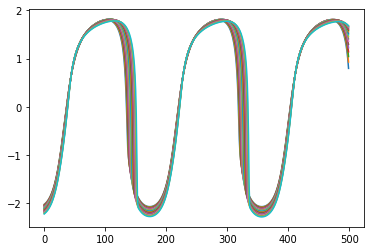

In [7]:
# Tuning Uh
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wf_param, 0)
    surge.setParamVal(wh_param, 12.0)
    surge.setParamVal(uf_param, 1)
    surge.setParamVal(bf_param, 1.0 / 6.0)

uh_vals = np.linspace(0.0, 1.0, 20)
for uh in uh_vals:
    surge, patch = create_surge()
    set_source_sine(surge, patch)
    set_fx(surge, patch)
    set_default_params(surge, patch)
    
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    surge.setParamVal(uh_param, uh)
    sine = process_sine(surge)
    plt.plot(sine[4000:4500])

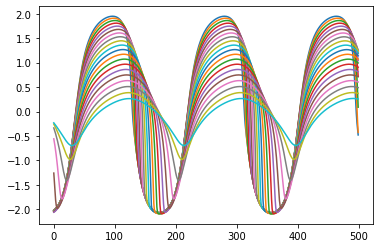

In [10]:
# Tuning bf
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wf_param, 0)
    surge.setParamVal(wh_param, 12.0)
    surge.setParamVal(uf_param, 0)
    surge.setParamVal(uh_param, 0)

bf_vals = np.linspace(0.0, 1.0, 20)
for bf in bf_vals:
    surge, patch = create_surge()
    set_source_sine(surge, patch)
    set_fx(surge, patch)
    set_default_params(surge, patch)
    
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(bf_param, bf)
    sine = process_sine(surge)
    plt.plot(sine[4000:4500])

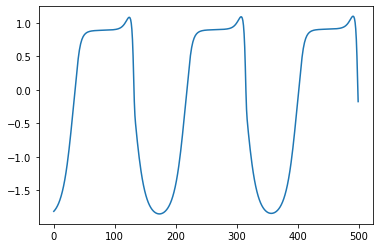

In [19]:
# Default settings
def set_default_params(surge, patch):
    wf_param = patch['fx'][GFX0_IDX]['p'][0]
    wh_param = patch['fx'][GFX0_IDX]['p'][1]
    uf_param = patch['fx'][GFX0_IDX]['p'][2]
    uh_param = patch['fx'][GFX0_IDX]['p'][3]
    bf_param = patch['fx'][GFX0_IDX]['p'][4]
    surge.setParamVal(wf_param, 1.0)
    surge.setParamVal(wh_param, 12.0)
    surge.setParamVal(uf_param, 0.8)
    surge.setParamVal(uh_param, 0.75)
    surge.setParamVal(bf_param, 1.0 / 6.0)

surge, patch = create_surge()
set_source_sine(surge, patch)
set_fx(surge, patch)
set_default_params(surge, patch)

sine = process_sine(surge)
plt.plot(sine[4000:4500])